# Uso de los números aleatorios

## 1. Introducción al Módulo random

El módulo random de la librería estándar de Python incluye un conjunto de funciones que permiten obtener de distintos modos
números pseudoaleatorios a través del algoritmo [Mersenne Twister](https://es.wikipedia.org/wiki/Mersenne_twister).

In [ ]:
#importamos el módulo que vamos a usar

import random

Las funciones de los módulos se invocan con el formato: módulo.función().

En el módulo random existe la función random, que devuelve un número aleatorio que sigue una distribución uniforme.

Así, para obtener $x \sim U(0,1)$:

In [ ]:
x = random.random()  #Cada ejecución dará un número distinto.
print(x)

0.4745559644551435


Se puede usar algún bucle si se desea generar una secuencia $x_i \sim U(0,1)$ con $i = 1, 2, 3,..., N$:

In [ ]:
for i in range(10):
    print('%05.4f' % random.random(), end=' ')  #El código en rojo indica la cantidad de dígitos y de decimales a mostrar.
print()

0.4034 0.2777 0.0367 0.4686 0.8250 0.2473 0.0315 0.4018 0.6653 0.0864 


In [ ]:
for i in range(10):
    print('%05.4f' % random.random(), sep="\t")
print()

0.2365
0.7289
0.7117
0.2072
0.6567
0.3352
0.9927
0.3488
0.0608
0.0227



La función seed() fija el valor de la semilla en la generación de la secuencia de números aleatorios.
Esto es útil cuando se quieren utilizar los mismos datos de entrada en una simulación.

In [ ]:
random.seed(1) #primero fijamos la semilla

for i in range(20):
    print('%05.4f' % random.random(), end=' ')
print()

0.1344 0.8474 0.7638 0.2551 0.4954 0.4495 0.6516 0.7887 0.0939 0.0283 0.8358 0.4328 0.7623 0.0021 0.4454 0.7215 0.2288 0.9453 0.9014 0.0306 


## Ejercicio 1:
    a)Usar la función random() para simular 1 volado.
    b)Usar la función random() para simular 1000 volados.
    c)Determinar de b) la probabilidad de que ocurra "sol" en un volado.

solucion a)


In [ ]:
x=random.random()
if x >0.50:
  print("La moneda cayo en sol")
else:
  print("La moneda cayo en aguila")

La moneda cayo en sol


solucion b)

In [ ]:
sol=0
aguila=0
for i in range(100):
  tirada=random.random()
  if tirada > 0.50:
   sol+=1
  else:
   aguila+=1
print("sol:",sol, "y aguilas:", aguila)

sol: 53 y aguilas: 47


solucion c)

In [ ]:
probabilidad = (sol/(sol+aguila))*100
print("La probabilidad de que caiga sol es=",probabilidad,"%")

La probabilidad de que caiga sol es= 53.0 %


La función uniform() devuelve un número float incluido entre los valores indicados.

In [ ]:
for i in range(10):
    print('%5.4f' %random.uniform(1, 50), end=' ')
print()

2.2468 27.5292 47.0183 19.6790 11.6134 21.6837 2.4230 11.8629 22.4565 25.2948 


La función randint() devuelve un número entero incluido entre los valores indicados.
Los valores de los límites inferior y superior también pueden aparecer entre los valores devueltos.

In [ ]:
for i in range(20):
    print(random.randint(-100, 100), end=' ')
print()

-41 -12 -41 73 -44 94 17 -26 -95 6 42 64 -75 -53 61 85 -25 -70 90 -15 


## Ejercicio 2:
    a) Simular un sorteo de los colores blanco, negro, rojo, azul y verde.
    

Solucion a)

In [ ]:
x=random.randint(1,5)
if x==1:
  print("el color es blanco")
if x==2:
  print("el color es negro")
if x==3:
  print("el color es rojo")
if x==4:
  print("el color es azul")
else:
  print("el color es verde")

el color es rojo
el color es verde


La función randrange() devuelve enteros que van desde un valor inicial a otro final
separados entre sí un número de valores determinados.

In [ ]:
for i in range(20):
    print(random.randrange(0, 20, 3), end=' ')
print()

15 15 12 9 12 18 15 3 6 6 12 9 18 12 9 12 18 0 9 3 


# 2. Estimación del número $\pi$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

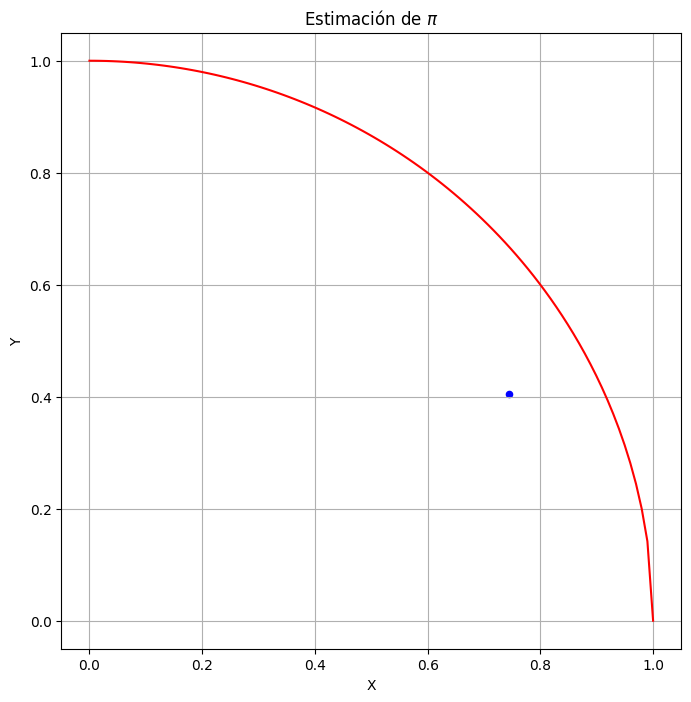

In [ ]:
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)               # Ecuación del círculo en el primer cuadrante


x_1 = random.random()
y_1 = random.random()

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1)
plt.scatter(x_1, y_1, s=20, c="blue")
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

# Tarea 1.
    Estimar el valor de pi usando la función random

Solucion

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def punto():
    coordenadas=[np.random.uniform(-1,1), np.random.uniform(-1,1)]
    return coordenadas[0]**2+coordenadas[1]**2<1, coordenadas

In [ ]:
def aproxPi(n):
    dentro=0
    Xdentro=[]
    Ydentro=[]
    Xfuera=[]
    Yfuera=[]
    for i in range(n):
        estado, coordenadas = punto()
        if estado:
            dentro+=1
            Xdentro.append(coordenadas[0])
            Ydentro.append(coordenadas[1])
        else:
            Xfuera.append(coordenadas[0])
            Yfuera.append(coordenadas[1])
    return 4*dentro/n, Xdentro, Ydentro, Xfuera, Yfuera

In [ ]:
n=10000
π=aproxPi(n)
print("n=",n, "pi =", π[0])

n= 10000 pi = 3.122


## La aproximación analítica

Partamos de la ecuación:

##     $\pi = 4\arctan 1$

y usemos la aproximación de Taylor para expandir en una serie de potencias.

Recordar:

$f(x) = f(0) + f´(x)x + \frac{1}{2}f´´(0)x^2 + ...$

$Si f(x) = \arctan x$ entonces:

$f´(x) = \frac{d \arctan x}{dx} = \frac{1}{1 + x^2} \rightarrow f´(0) = 1$

$f´´(x) = \frac{d^2 \arctan x}{d^2x} = - \frac{2x}{(1 + x^2)^2} \rightarrow f´´(0) = 0$

...

$f^{2i + 1}(x) = (-1)^{i} \frac{(2i)!}{(1 + x^2)^{2i + 1}} \rightarrow f^{2i + 1}(0) = (-1)(2i)!$

$f^{2i}(x) = 0$

Entonces:

$\arctan x = \sum_{i = 0} (-1)^{i} \frac{x^{2i + 1}}{2i + 1}$

Por tanto:

## $\pi = \sum_{i = 0} (-1)^{i} \frac{4}{2i + 1}$

In [ ]:
def pi_taylor(n):
    pi = 0
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
        print(i, pi)

In [ ]:
pi_taylor(10)

In [ ]:
def pi_Taylor(n):
    pi = 0
    L =[]
    for i in range(n):
        pi = pi + 4.0/(2*i+1)*(-1)**i
        L.append(pi)
    fig = plt.figure(1, figsize=(8, 8))
    plt.plot(L, color="red", markersize=1)
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación")
    plt.grid()
    plt.show()

In [ ]:
pi_Taylor(200)

## Ejercicio 3:

Graficar las salidas obtenidas en la Tarea 1

solucion

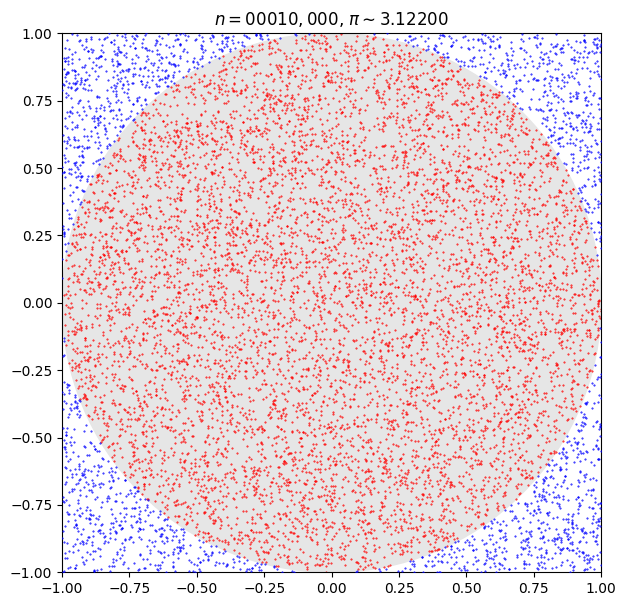

In [ ]:
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(111)
ax.set_aspect('equal')

circulo = plt.Circle((0, 0), 1, color='0.9', fill=True, zorder=1)
ax.add_artist(circulo)
ax.scatter(π[1],π[2], s=0.2, c='r', marker="o", zorder=2)
ax.scatter(π[3],π[4], s=0.2, c='b', marker="o", zorder=3)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title(f'$n={n:0>9,}$, $\pi \sim {π[0]:0<7.5}$')
plt.show()

## Continuamos

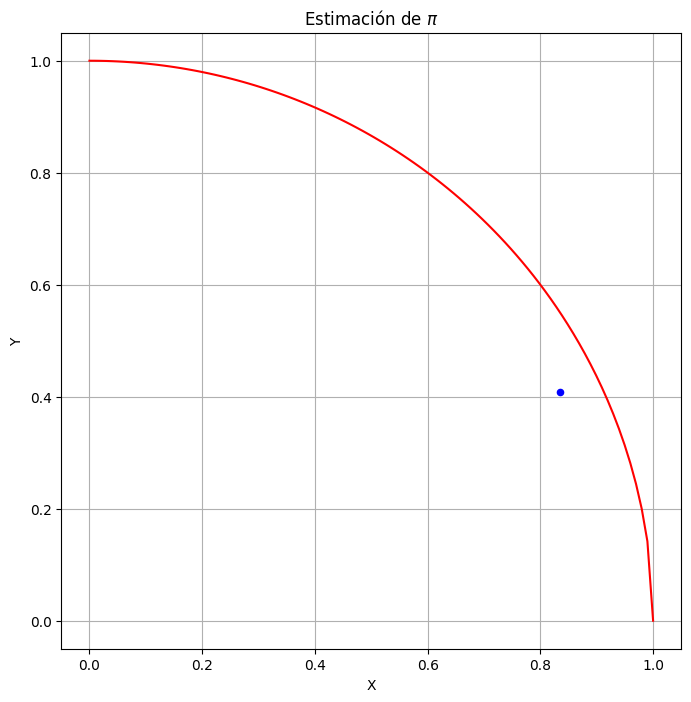

In [ ]:
x = np.linspace(0, 1, 100)
y = np.sqrt(1 - x**2)               # Ecuación del círculo en el primer cuadrante


x_1 = random.random()
y_1 = random.random()

fig = plt.figure(1, figsize=(8, 8))        # Aquí fijamos el formato de la gráfica para que sea cuadrada.
plt.plot(x, y, color="red", markersize=1)
plt.scatter(x_1, y_1, s=20, c="blue")
plt.title("Estimación de $\pi$")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [ ]:
def pi_mc(n):
    pi = 0
    counter = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
        pi = 4.0*float(counter)/(i + 1)
        print(i, pi)

In [ ]:
pi_mc(10)

0 0.0
1 2.0
2 2.6666666666666665
3 3.0
4 3.2
5 3.3333333333333335
6 3.4285714285714284
7 3.0
8 3.111111111111111
9 3.2


In [ ]:
def pi_mc(n):
    pi = 0
    lx = []
    ly = []
    counter = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <1:
            counter = counter + 1
            lx.append(counter)
            ly.append(4.0*float(counter)/(i + 1))

        pi = 4.0*float(counter)/(i + 1)

        e = np.absolute((pi - np.pi)/np.pi)
    print("pi =", pi)
    print("error =", e)

    fig = plt.figure(1, figsize=(8, 8))
    plt.xlabel("Iteraciones")
    plt.ylabel("Estimación de $\pi$")
    plt.grid()
    plt.plot(lx, ly, color="blue", markersize=1)
    plt.show()

pi = 3.14
error = 0.0005069573828972128


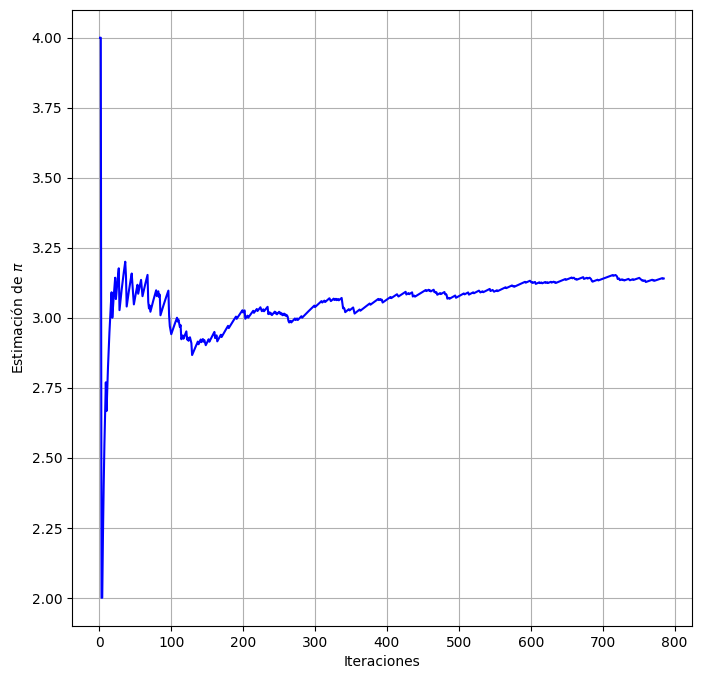

In [ ]:
pi_mc(1000)

Si se tiene, para cada punto aleatorio:
    
$X_i = 1$ si cae dentro del circulo y

$X_i = 0$ si cae fuera

## Ejercicio 4:

a) Calcular $E[X_i]$ y $V[X_i]$




Para el experimento de simulación, definimos $Z_N = \frac{X_1 + X_2 + ... + X_N}{N}$

solucion

## Ejercicio 5:
a) Calcular  $E[Z_N]$ y $V[Z_N]$
b) ¿Cuál debe ser el valor de $N$ para que el error sea de 0.01?

pi = 3.2
error = 0.018591635788130244


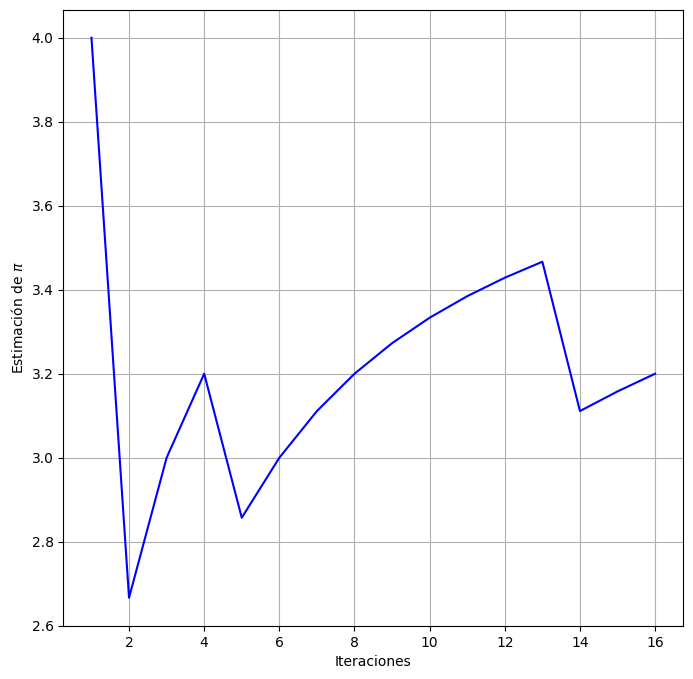

In [ ]:
lista=pi_mc(20)

# Integrales

In [ ]:
def riemannplot(f, a, b, ra, rb, n):
    # f es la función
    # a y b son los limites del eje x para graficar la funcion f
    # ra y rb son los limites del intervalo en el eje x del que queremos calcular la suma
    # n es el numero de rectangulos que calcularemos

    atenuacion = (b-a)/100
    x = np.arange(a, b+atenuacion, atenuacion)

    plt.plot(x, f(x), color='red')

    delta_x = (rb-ra)/n
    riemannx = np.arange(ra, rb, delta_x)
    riemanny = f(riemannx)
    riemann_sum = sum(riemanny*delta_x)

    plt.bar(riemannx,riemanny,width=delta_x,alpha=0.5,edgecolor = 'black',facecolor='green')

    plt.xlabel('x')
    plt.ylabel('f(x)')

    plt.title('Suma de Riemann por la izquierda de f(x)')
    plt.figtext(0.1,-0.05, "Suma de Riemann: %.5f " %(riemann_sum), color='b')
    plt.savefig('riemann.png')
    plt.show()

In [ ]:
def f(x):
    return np.sqrt(np.arctan(x))

In [ ]:
riemannplot(f, 0, 1.001, 0, 1.001, 20)